# NLP Coursework dataset visualisation
This notebook contains some visualisations of the PLOD-CW dataset

In [1]:
#Loading the dataset in
from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

c:\Users\liamd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For the sake of this visualisation, I am only interested in working with the training part of the dataset.

In [2]:
training_set = dataset["train"]
tokens = training_set["tokens"]
len(tokens)


1072

In [3]:
#check for duplicate tokens
aggregate = []
for i in tokens[:10]:
  print(i)

['For', 'this', 'purpose', 'the', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', '(', 'GYPES', ')', 'was', 'developed', '.']
['The', 'following', 'physiological', 'traits', 'were', 'measured', ':', 'stomatal', 'conductance', '(', 'gs', ',', 'mol', 'H2O', 'm-2', 's-1', ')', ',', 'transpiration', 'rate', '(', 'E', ',', 'mmol', 'H2O', 'm-2', 's-1', ')', ',', 'net', 'photosynthetic', 'rate', '(', 'PN', ',', 'μmol', 'm-2', 's-1', ')', 'and', 'intercellular', 'CO2', 'concentration', 'CO2', '(', 'Ci', ',', 'μmol', 'm-2', 's-1', ')', '.']
['Minor', 'H', 'antigen', 'alloimmune', 'responses', 'readily', 'occur', 'in', 'the', 'setting', 'of', 'human', 'leukocyte', 'antigen', '(', 'HLA)–matched', 'allogeneic', 'solid', 'organ', 'and', 'stem', 'cell', 'transplantation', '(', 'SCT', ')', '[', '3,4', ']', '.']
['EPI', '=', 'Echo', 'planar', 'imaging', '.']
['Furthermore', ',', 'eNOS', '-', 'derived', 'NO', 'S', '-', 'nitrosylated', 'β', '-', 'actin', 'on', 'Cys374', 'and', 'impaired', 'act

# Frequency analysis on tokens in the dataset
Each 'token' in the training set is a sentence. \
We will do frequency analysis on a word by word basis so we will iterate over each word in each token

In [4]:
#form a list of all the words in all of the tokens
words=[]
for token in tokens:
  for part in token:
    words.append(part)

print(len(words))
print(len(tokens))

40000
1072


In [5]:
import nltk
nltk.download()



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
from nltk.corpus import inaugural
doc = "2017-Trump.txt"
document = inaugural.raw(doc)
len(inaugural.words(doc))
print(inaugural.words(doc)[:10])
print(len(inaugural.words(doc)))
print(len(set(inaugural.words(doc))))

['Chief', 'Justice', 'Roberts', ',', 'President', 'Carter', ',', 'President', 'Clinton', ',']
1693
582


# Freq analysis on the training set

In [7]:
from nltk import FreqDist
fd_training = FreqDist(word.lower() for word in words)

[(',', 2268), ('(', 1583), (')', 1575), ('the', 1270), ('.', 1073), ('of', 1006), ('and', 903), ('-', 901), (';', 691), ('in', 639)]


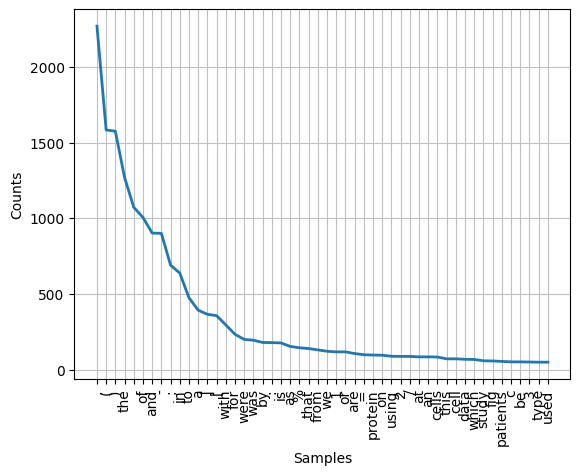

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
print(fd_training.most_common(10))
fd_training.plot(50)

## Frequency analysis - Removing stopwords 
Above we have analysed term frequency in the dataset, but like most documents, the most common words are ones like 'and', 'the' etc. These are 'stop words' and should ideally be removed before frequency analysis if we aim to learn anything about the documents meaning

In [9]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
nltk_filtered = [word for word in words if word.lower() not in stops]
print(len(words))
print(len(nltk_filtered))
fd_nltk = FreqDist(nltk_filtered)


40000
31497


[(',', 2268), ('(', 1583), (')', 1575), ('.', 1073), ('-', 901), (';', 691), (']', 367), ('[', 358), (':', 180), ('%', 146)]


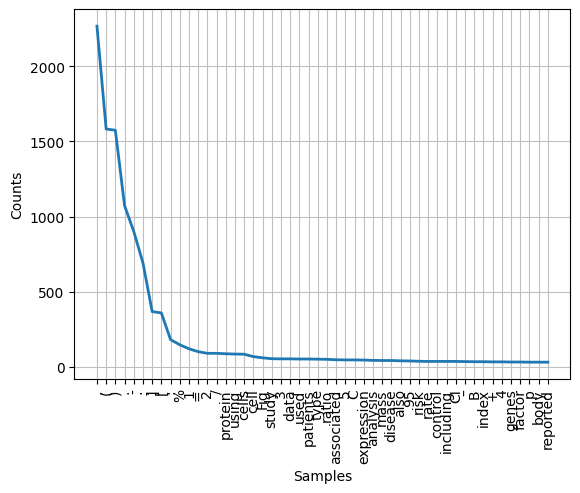

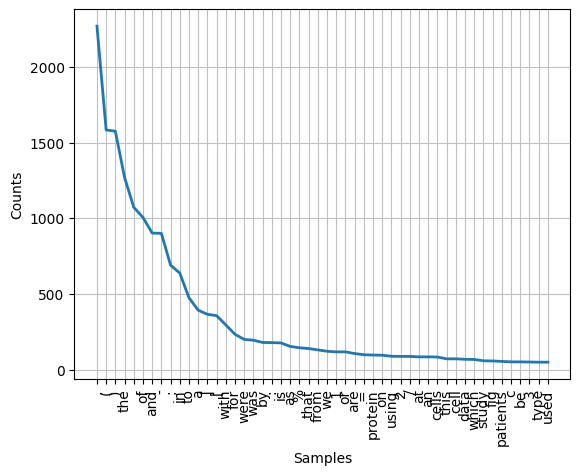

<Axes: xlabel='Samples', ylabel='Counts'>

In [10]:
print(fd_nltk.most_common(10))
fd_nltk.plot(50)
fd_training.plot(50)

The NLTK english stopword list has partially worked for removing 'meaningless' words from the word list, but there are still some other symbols that are not particulary useful for discerning meaning. \
I will now use the spacy library with their stop word list and puncutation filtering to remove unnecessary numbers and symbols from the tokens

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(words))
print(doc)


For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed . The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) . Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] . EPI = Echo planar imaging . Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) . The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respectively , which r

['purpose', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', 'GYPES', 'developed', 'following', 'physiological']


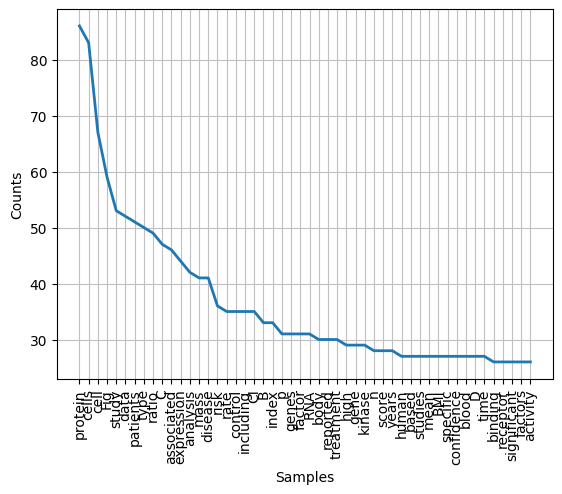

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
spacy_filtered = [word.text for word in doc if not word.is_stop and not word.is_punct and not word.is_digit and word.is_alpha]
print(spacy_filtered[:10])
spacy_filtered_freq = FreqDist(spacy_filtered)
spacy_filtered_freq.plot(50)

## spaCy stopword performance
From the above graph we can see that all of the 'noise' has been removed from the tokens. We are now only left with 'alpha' tokens that actually give 'meaning' to the dataset.
spaCy's stopword list has removed a lot of the non alphabetical characters, whether or not this is a good thing depends on the use case


# Average word length calculations


In [13]:
#Take list of tokens, then select only alphas
only_words = [word.text for word in doc if word.is_alpha]
print(len(only_words))
unique_words = set(only_words)
average_word_length = sum(len(word) for word in unique_words) / len(unique_words)
print(f"Average word length is {average_word_length:.2f} characters")

28089
Average word length is 7.11 characters


# Analysis on POS and NER tags
Now that we have a good idea of the datasets context (from word frequencies), it is a good idea to try and gauge the distribution of word types in the dataset. \
For this I will be looking at the distribution of the different NER tags in the dataset


{'B-O': 32971, 'B-AC': 2336, 'B-LF': 1462, 'I-LF': 3231}
Total tags:  40000


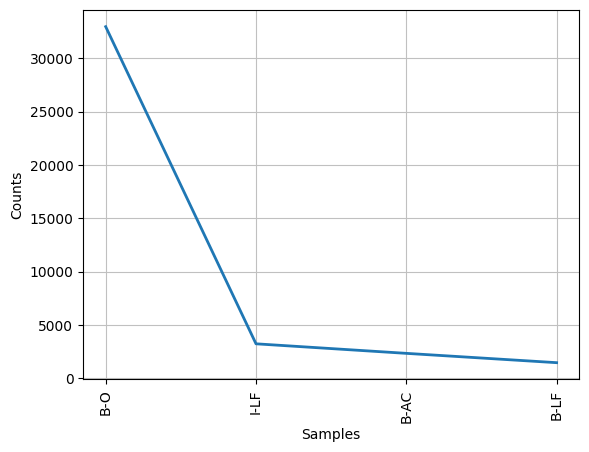

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
#iterate over NER tags in training set
ner_tags = {'B-O': 0, 'B-AC': 0, 'B-LF': 0, 'I-LF':0}
for example in training_set:
  for tag in example["ner_tags"]:
    ner_tags[tag] += 1   


print(ner_tags)
#calculate total tags from dict
total = 0 
for i,v in ner_tags.items():
  total += v

print("Total tags: ", total)  

# Create a FreqDist object for ner_tags
ner_tags_freq = FreqDist(ner_tags)

# Plot the distribution
ner_tags_freq.plot()





# Observations
From the above graph we can see that there are a lot more B-O tags than any of the other tags, so we might want to keep this in mind during the experiments